
**<h1>Introduction</h1>**



**<h3> Motivation </h3>**

The video game industry has always been a multi-billion dollar market, and Steam stands as its most dominant PC storefront. As a lifelong gamer, I have always been fascinated by the sheer volume of titles released yearly. Ranging from solo-developed Indie gems to massive AAA titles.

However, the marketplace is crowded. For every masterpiece, thousands of games go unnoticed. This project aims to move beyond subjective opinion and use data to understand what drives success on the platform. By analyzing pricing strategies, genre trends, and review sentiment, I aim to uncover the quantitative patterns that separate a game from being a success.. or a flop.

**<h3> Key Objectives: </h3>**
- Identify correlations between Genre and User Ratings.
- Analyse the pricing strategy differences between Indie and AAA titles.
- Determine if lower price points correlate with higher ratings.
- Predict whether a game will be a "hit" or a "flop" using XGBoost.

**<h3> Data Source: </h3>**
Dataset is created by Martin Bustos on Kaggle. Data is collected from both the API provided by Steam themselves and Steam Spy, a Steam stats service based on Web API provided by Valve. <br>
https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/data

**<h3> Attributes / Features: </h3>**
**AppID**: Unique identifier for each game on the Steam store.

**Name**: The game's title.

**Release date**: The date the game was released on Steam.

**Estimated owners**: A range estimating the number of people who own the game (e.g., "0 - 20000", "20000 - 50000").

**Peak CCU**: The peak number of Concurrent Users (players) in the game on the previous day.

**Required age**: The minimum age required to play the game (0 indicates all ages).

**Price**: The current price of the game in US Dollars.

**DiscountDLC count**: The number of downloadable content (DLC) packs available for the game. 

**About the game**: A brief text description or summary of the game's content.

**Supported languages**: A list of all languages supported by the game (interface, audio, or subtitles).

**Full audio languages**: A list of languages that have full audio support (voice acting).

**Reviews**: A text summary of the user review score (e.g., "Overwhelmingly Positive", "Mixed").

**Header image**: The URL to the game's main header image/banner on the store.

**Website**: The URL to the game's official website.

**Support url**: The URL for the game's customer support page.

**Support email**: The contact email address for game support.

**Windows**: True if the game is compatible with Windows, False otherwise.

**Mac**: True if the game is compatible with macOS, False otherwise.

**Linux**: True if the game is compatible with Linux, False otherwise.

**Metacritic score**: The game's critic score from Metacritic (0 if not available).

**Metacritic url**: The URL to the game's Metacritic page.

**User score**: A score calculated based on user reviews (0 if not available or insufficient data).

**Positive**: The total count of positive user reviews.

**Negative**: The total count of negative user reviews.

**Score rank**: A ranking of the game based on its user score compared to others (often null for most games).

**Achievements**: The total number of in-game achievements available.

**Recommendations**: The number of times users have recommended this game.

**Notes**: Extra information or warnings about the game content.

**Average playtime forever**: The average total playtime for all owners of the game (in minutes).

**Average playtime two weeks**: The average playtime in the last two weeks (in minutes).

**Median playtime forever**: The median total playtime for owners of the game (in minutes).

**Median playtime two weeks**: The median playtime in the last two weeks (in minutes).

**Developers**: The name of the studio or individual who created the game.

**Publishers**: The name of the company that published the game.

**Categories**: A list of game categories (e.g., "Single-player", "Multi-player", "Co-op").

**Genres**: A list of genres the game belongs to (e.g., "Action", "Indie", "RPG").

**Tags**: User-defined tags that describe the game (e.g., "Pixel Art", "Difficult").

**Screenshots**: URLs to screenshots of the gameplay.

**Movies**: URLs to trailers or promotional videos.

**<h2> 1. Data Preprocessing </h2>**

First let's import the libraries that we'll need for the Exploratory Data Analysis (EDA). 

In [4]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For our model later on.
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Lets read the dataset with Pandas.

In [6]:
steam_games = pd.read_csv('../data/games.csv')

Now, let's figure out how many rows and columns does this dataset have.

In [7]:
shape = steam_games.shape
print(f"The shape of the dataset is: {shape}")

The shape of the dataset is: (111452, 39)


Taking a peak at the top 5 rows.

In [8]:
steam_games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Check for all the columns that are present in the dataset, lets see the attributes that we're working with.

In [9]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111452 entries, 20200 to 3183790
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       111446 non-null  object 
 1   Name                        111452 non-null  object 
 2   Release date                111452 non-null  object 
 3   Estimated owners            111452 non-null  int64  
 4   Peak CCU                    111452 non-null  int64  
 5   Required age                111452 non-null  float64
 6   Price                       111452 non-null  int64  
 7   DiscountDLC count           111452 non-null  int64  
 8   About the game              104969 non-null  object 
 9   Supported languages         111452 non-null  object 
 10  Full audio languages        111452 non-null  object 
 11  Reviews                     10624 non-null   object 
 12  Header image                111452 non-null  object 
 13  Website       

Lets check for the missing values for each of the columns.

In [10]:
steam_games.isnull().sum()

AppID                              6
Name                               0
Release date                       0
Estimated owners                   0
Peak CCU                           0
Required age                       0
Price                              0
DiscountDLC count                  0
About the game                  6483
Supported languages                0
Full audio languages               0
Reviews                       100828
Header image                       0
Website                        64994
Support url                    60693
Support email                  19025
Windows                            0
Mac                                0
Linux                              0
Metacritic score                   0
Metacritic url                107447
User score                         0
Positive                           0
Negative                           0
Score rank                    111408
Achievements                       0
Recommendations                    0
N

We can see that some columns such as 'Reviews', 'Metacritic url', 'Score rank' have very large amounts of empty values compared to the amount of rows (111452). Lets compute the percentage of the missing values to confirm how much is really missing.

In [11]:
missing_percentage = steam_games.isnull().sum() * 100 / len(steam_games)
missing_percentage[['Reviews', 'Metacritic url', 'Score rank']] 

Reviews           90.467645
Metacritic url    96.406525
Score rank        99.960521
dtype: float64

With a missing values percentage of above 90%, Its pretty clear that the remaining 10% won't contribute meaningful information. Attempt at imputing these values where the columns have 90% of their values missing could lead to significant increases in bias and inaccuracies, as there is insufficient amount of data to reliably estimate the missing values.

In [12]:
steam_games.drop(['Reviews', 'Metacritic url', 'Score rank'], axis = 1, inplace = True)

In [13]:
steam_games.shape

(111452, 36)

We've verified that the 3 columns are dropped. Now lets check the percentage of missing values for the other remaining attributes by plotting them.

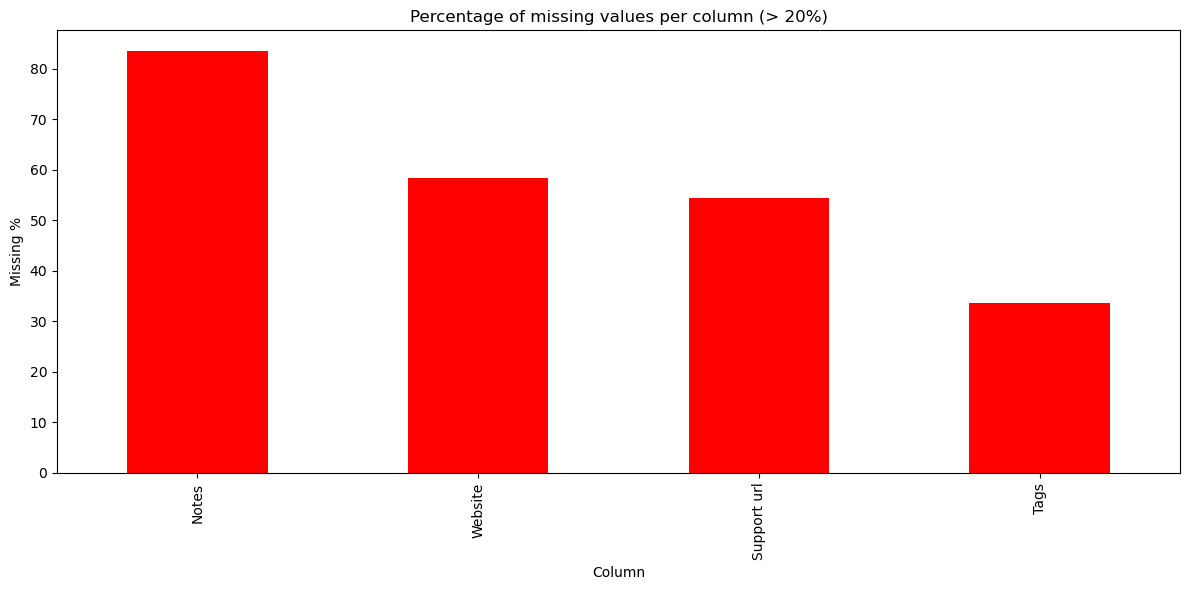

In [14]:
# To keep only the columns with a missing percentage rate of over 20%.
rem_missing_percentage = steam_games.isnull().sum() * 100 / len(steam_games)
rem_missing_percentage = rem_missing_percentage[rem_missing_percentage > 20]

plt.figure(figsize = (12, 6))
rem_missing_percentage.sort_values(ascending = False).plot(kind = "bar", color = 'red')
plt.title("Percentage of missing values per column (> 20%)")
plt.xlabel('Column')
plt.ylabel('Missing %')
plt.tight_layout()


In [15]:
print(steam_games['Notes'].value_counts())

Notes
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content                                                       148
Nakedness. All characters appearing in this game are over 18 years of age.                                                                                                                                         118
-Nudity or sexual content -Not suitable for watching at work -Not suitable for all ages -All characters in the game are over 18 years old                                                                           70
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: General Mature Content                                                                                   48
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, 

Since 'Notes' here is unstructured and also redundant (since we already have the 'Required Age' column) + the missing percentage of missing values of over 80%, we'll also be dropping this column. Website and support url are also useless to our analysis + their relatively high percentage is also a clear indicator of shaving them off our dataset.  

In [16]:
steam_games.drop(['Notes', 'Website', 'Support url', 'Support email'], axis = 1, inplace = True)

In [17]:
steam_games.isnull().sum()

AppID                             6
Name                              0
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DiscountDLC count                 0
About the game                 6483
Supported languages               0
Full audio languages              0
Header image                      0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     6475
Publishers                     6778
Categories                  

In [18]:
print(steam_games['About the game'].value_counts())

About the game
Help the beautiful girls to immerse themselves in their memories and remember the wonderful moments of their lives. This game is a classic puzzle game with several levels of difficulty and beautiful arts. All characters appearing in this game are over 18 years of age. Enjoy ;-) - Puzzle Game - Artworks - Nice music - Steam achievements Keyboard H: Complete Level                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Since we dont plan on doing text analysis using NLP (Natural Language Processing) to analyse the keywords for this particular project, I plan on dropping the 'About the game' column due to the same reason as with the case of the 'Notes' column. 

In addition, since the 'Screenshots' and 'Movies' column are both just links to media of their respective games, these columns are not useful for our analysis. Thus, we'll drop them alongside the 'About the game' column.

In [19]:
steam_games.drop(['About the game', 'Screenshots', 'Movies'], axis = 1, inplace = True, errors = 'ignore')

In [20]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111452 entries, 20200 to 3183790
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       111446 non-null  object 
 1   Name                        111452 non-null  object 
 2   Release date                111452 non-null  object 
 3   Estimated owners            111452 non-null  int64  
 4   Peak CCU                    111452 non-null  int64  
 5   Required age                111452 non-null  float64
 6   Price                       111452 non-null  int64  
 7   DiscountDLC count           111452 non-null  int64  
 8   Supported languages         111452 non-null  object 
 9   Full audio languages        111452 non-null  object 
 10  Header image                111452 non-null  object 
 11  Windows                     111452 non-null  bool   
 12  Mac                         111452 non-null  bool   
 13  Linux         

This leaves us with around 28 columns! a relatively huge reduction of features from the initial count of 39 columns.

In [21]:
steam_games.isnull().sum()

AppID                             6
Name                              0
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DiscountDLC count                 0
Supported languages               0
Full audio languages              0
Header image                      0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     6475
Publishers                     6778
Categories                     7566
Genres                      

To handle the missing developers and publishers, we could impute the "Unknown" value to substitute the missing values. This is because the names of the developer and publishers could influence the success of the games, atleast from domain knowledge. 

The same goes for the 'Categories', 'Genres', and 'Tags' column. I initially thought of using the mode (for example if the leading genre was Horror, then all the missing values would be imputed as Horror also), but this could artificially alter the data to be imbalanced and increase the bias and also just plainly miscategorise a game.

In [22]:
# Impute the 'Unknown' values to substitute the missing values.
steam_games['Developers'] = steam_games['Developers'].fillna('Unknown')
steam_games['Publishers'] = steam_games['Publishers'].fillna('Unknown')
steam_games['Categories'] = steam_games['Categories'].fillna('Unknown')
steam_games['Genres'] = steam_games['Genres'].fillna('Unknown')
steam_games['Tags'] = steam_games['Tags'].fillna('Unknown')

In [23]:
steam_games.isnull().sum()

AppID                         6
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
DiscountDLC count             0
Supported languages           0
Full audio languages          0
Header image                  0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
dtype: int64

In [24]:
steam_games.shape

(111452, 29)

In [25]:
steam_games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,Supported languages,Full audio languages,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,['English'],[],...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",Unknown
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,"['English', 'Spanish - Spain']",[],...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [26]:
print(steam_games['AppID'].value_counts())


AppID
Shadow of the Tomb Raider: Definitive Edition    20
Alone                                             6
Aurora                                            5
The Tower                                         5
Nightmare                                         5
                                                 ..
Fallout 4 VR                                      1
Finding summer                                    1
New Zealand Virtual Debating Chamber              1
CuBe                                              1
Defense Of Fort Burton                            1
Name: count, Length: 110325, dtype: int64
